# Fraud Detection in Credit Card Transactions


## **1. Introduction**  

Credit card fraud is a major concern in financial transactions, costing billions of dollars worldwide. **Fraudulent activities include unauthorized transactions, identity theft, and card skimming.**  

To tackle this issue, **machine learning models** are widely used to detect fraudulent transactions by analyzing patterns in data. In this project, we will:  

- **Load and explore the dataset**
- **Perform Exploratory Data Analysis (EDA)**
- **Handle class imbalance**
- **Train a Logistic Regression model**
- **Evaluate model performance using precision, recall, and F1-score**
- **Discuss future improvements**  

This guide provides a **step-by-step** approach to fraud detection using Python, along with **visualizations and code explanations** to help students understand the process.  

---


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("creditcard.csv")

# Display the first few rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
print(df.isnull().sum())  # Check for missing values


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
print(df.describe())  # Summary statistics of numerical features

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

/tmp/ipykernel_96090/1522489212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Class"], palette=["blue", "red"])


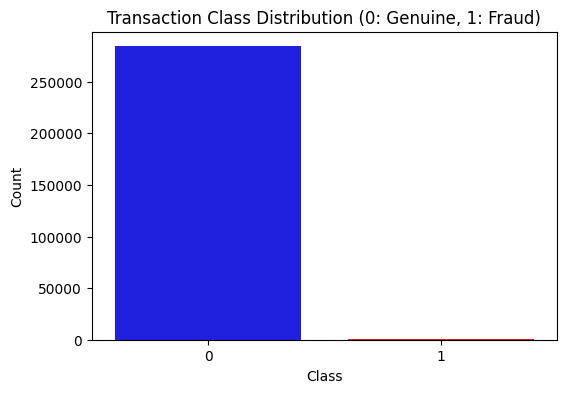

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=df["Class"], palette=["blue", "red"])
plt.title("Transaction Class Distribution (0: Genuine, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_96090/2194919414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=df, palette=["blue", "red"])


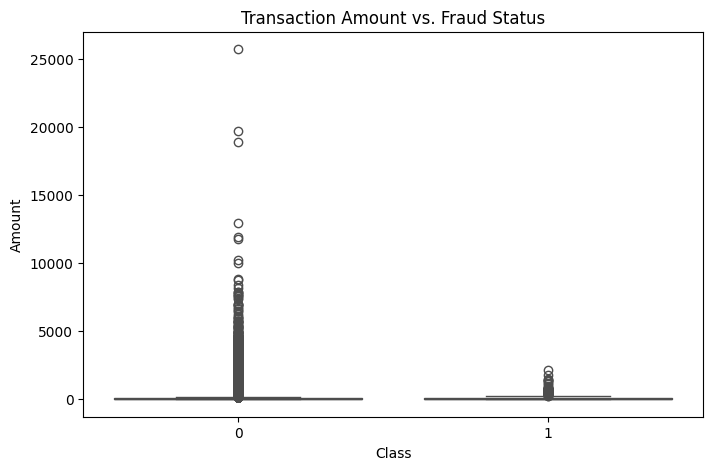

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Class", y="Amount", data=df, palette=["blue", "red"])
plt.title("Transaction Amount vs. Fraud Status")
plt.show()

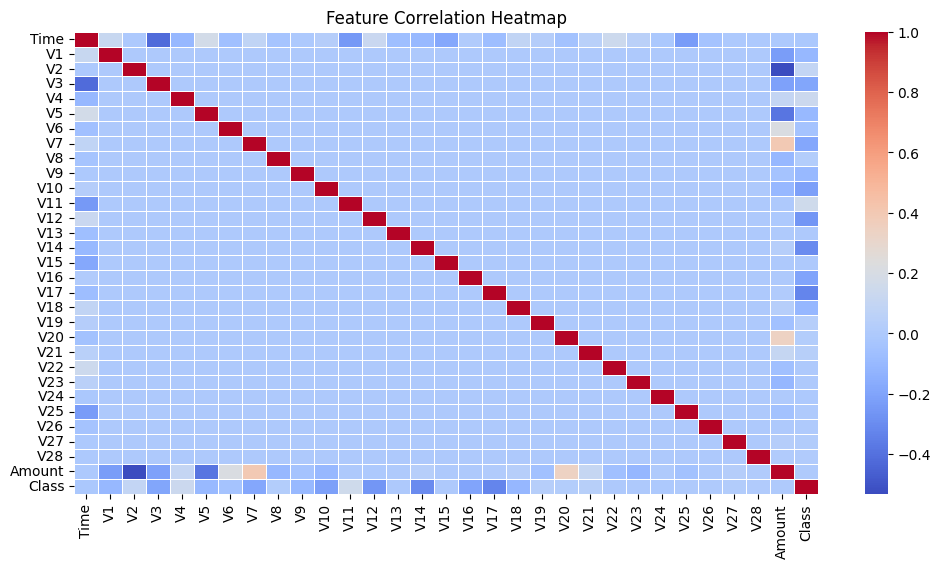

In [6]:
# Compute correlation
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# q1) Calculate the frequency of each class
# your code here

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
# q2) calculate the percentage of fraud cases
fraud_percentage = # your code here
print(f"Percentage of Fraud Cases: {fraud_percentage:.2f}%")

Percentage of Fraud Cases: 0.17%


In [ ]:
from imblearn.over_sampling import SMOTE

# q3) Drop rows where 'Class' is NaN
df = # your code here

# q4)  Define features and target

X = # your code here
y = # your code here

# q5) Fill missing values in features (if any)
X = # your code here

# q6) Apply SMOTE , a popular technique for handling imbalanced datasets (SMOTE = Synthetic Minority Over-sampling Technique)
smote = # your code here
X_resampled, y_resampled = # your code here


In [ ]:
from sklearn.model_selection import train_test_split

# q7) Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

/home/gokul_vit/vit/AI_ML/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# q8) Compute metrics
accuracy = # your code here
precision = # your code here
recall = # your code here
f1 = # your code here

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9739
Precision: 0.9819
Recall: 0.9657
F1 Score: 0.9737
